Bibliotecas

In [2]:
import sympy as sp
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
from sympy.printing import latex

Simbolos do sympy

In [3]:
t, g, m, l = sp.symbols('t g m l')

theta = sp.symbols(r'theta', cls=sp.Function)
theta = theta(t)
theta_dot = sp.diff(theta, t)
theta_ddot = sp.diff(theta_dot, t)

Equações da posição em 'x' e 'y' da massa

In [4]:
x = l*sp.sin(theta)
y = -l*sp.cos(theta)

Equação energia cinética

In [5]:
T1 = sp.Rational(1, 2)*m*sp.diff(x, t)**2

T = T1

T

l**2*m*cos(theta(t))**2*Derivative(theta(t), t)**2/2

Equação energia potencial gravitacional

In [6]:
U1 = y*m*g

U = U1

U

-g*l*m*cos(theta(t))

Equação de Lagrange

In [7]:
L = T - U

L

g*l*m*cos(theta(t)) + l**2*m*cos(theta(t))**2*Derivative(theta(t), t)**2/2

EDO θ(t)

In [8]:
eq = sp.diff(L, theta) - sp.diff(sp.diff(L, theta_dot), t)
EDOθ = sp.simplify(eq)

EDOθ

l*m*(-g*sin(theta(t)) + l*sin(2*theta(t))*Derivative(theta(t), t)**2/2 - l*cos(theta(t))**2*Derivative(theta(t), (t, 2)))

Solução da EDO

In [9]:
sols = sp.solve(EDOθ, theta_ddot)[0]

sols

-g*sin(theta(t))/(l*cos(theta(t))**2) + tan(theta(t))*Derivative(theta(t), t)**2

Transforma as equações simbólicas em equações solucionáveis

In [10]:
dz1dt_f = sp.lambdify((theta, theta_dot, g, l, m), sols)
dthetadt_f = sp.lambdify(theta_dot, theta_dot)
Ep = sp.lambdify((theta, g, l, m), U)
Ec = sp.lambdify((theta, theta_dot, m, l), T)

Função que será usada para retornar a posição e velocidade no intervalo de tempo proposto pela solução no método ODEINT

In [11]:
def dSdt(S, t, g, l, m):
    theta, thetad = S
    return [dthetadt_f(thetad),
            dz1dt_f(theta, thetad, g, l, m)]

Define as condições iniciais e calcula a solução da EDO

In [12]:
tempo_simulacao = 10  # 10 s
passo = 1000  # 0.001 s
t = np.linspace(0, tempo_simulacao, passo+1)
g = 9.81
l = 1
m = 1
deg = 30
theta0 = deg*np.pi/180
dtheta0 = 0

sol = odeint(dSdt, y0=[theta0, dtheta0], t=t, args=(g, l, m))

Posição e Velocidade da massa

In [13]:
thepos = sol.T[0]
thedot = sol.T[1]

Calcula a posição real com base no comprimento original da mola, como não há movimento na direção 'y' sua posição é sempre zero

In [14]:
def pos(t, the, l):
    x1 = l*np.sin(the)
    y1 = -l*np.cos(the)
    return [
        x1, y1
    ]


xpos, ypos = pos(t, thepos, l)

Cálcula as energias do sistema

In [15]:
Cine = Ec(thepos, thedot, m, l)
Pot = Ep(thepos, g, l, m)
Etotal = Cine + Pot

Plota a variação das energias

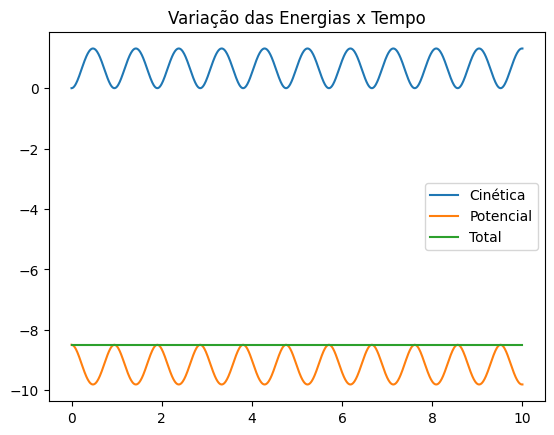

In [16]:
plt.title('Variação das Energias x Tempo')
plt.plot(t, Cine, label='Cinética')
plt.plot(t, Pot, label='Potencial')
plt.plot(t, Etotal, label='Total')
plt.legend()
plt.show()

Plota a função θ(t)

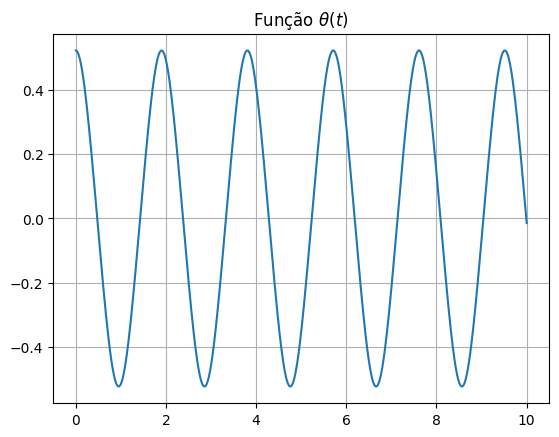

In [17]:
plt.title(f'Função ${latex(theta)}$')
plt.plot(t, thepos)
plt.grid()
plt.show()

Plota a função dθ(t)/dt

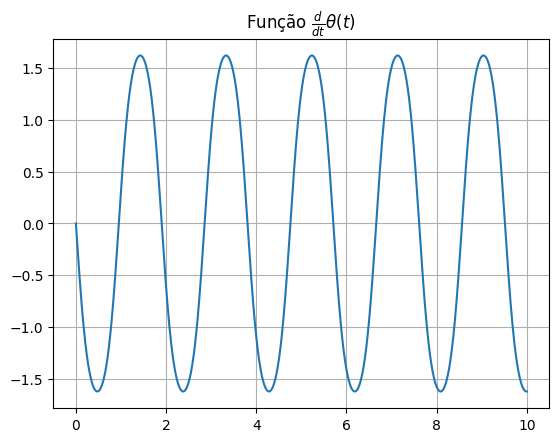

In [18]:
plt.title(f'Função ${latex(theta_dot)}$')
plt.plot(t, thedot)
plt.grid()
plt.show()

Plota a fase θ(t)xdθ(t)/dt

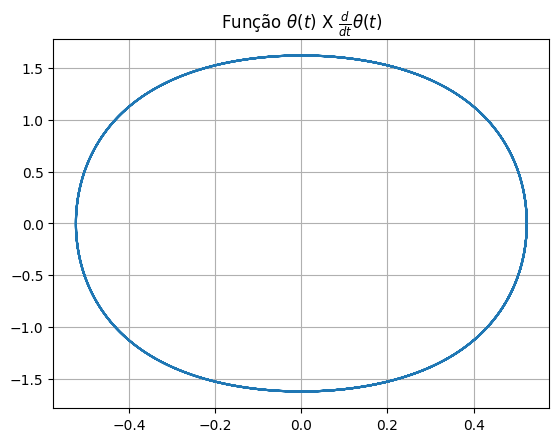

In [19]:
plt.title(f'Função ${latex(theta)}$ X ${latex(theta_dot)}$')
plt.plot(thepos, thedot)
plt.grid()
plt.show()

Plota a posição da massa em 'x'

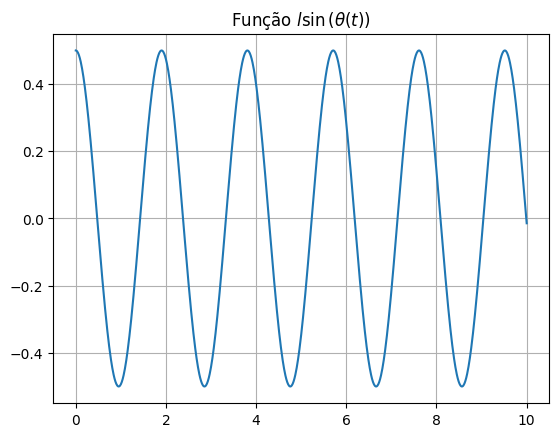

In [20]:
plt.title(f'Função ${latex(x)}$')
plt.plot(t, xpos)
plt.grid()
plt.show()

Plota a posição da massa em 'y'

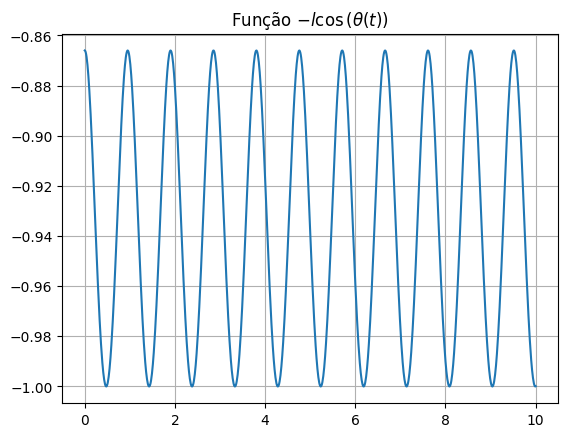

In [23]:
plt.title(f'Função ${latex(y)}$')
plt.plot(t, ypos)
plt.grid()
plt.show()

Cria a animação do sistema

In [22]:
def animate(i):
    ln.set_data([0, xpos[i]], [0, ypos[i]])
    cur.set_data(xpos[:i+1], ypos[:i+1])


fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_xlim((min(xpos)-0.5), (max(xpos)+0.5))
ax.set_ylim((min(ypos)-0.5), 0.5)
ax.grid()
ln, = ax.plot([], [], 'bo--', lw=2, markersize=8)
cur, = ax.plot(xpos[0], ypos[0], 'black', lw=1)

ani = animation.FuncAnimation(fig, animate, frames=passo, interval=10)
ani.save('pen_simples.gif', writer='pillow', fps=25)